In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.5.1+cu121'

In [4]:
weight = 0.7
bias = 0.3


# create data

start = 0
end = 1
step = 0.02


X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias


X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [9]:
len(X)*0.2

10.0

In [6]:
train_split = int(0.8 * len(X)) # taking 80% of the total data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] # 20% of total data in testing set

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [12]:
X_train.ndim, y_train.ndim, X_test.ndim, y_test.ndim # uniform dimensions

(2, 2, 2, 2)

In [17]:
X_test[:4]

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600]])

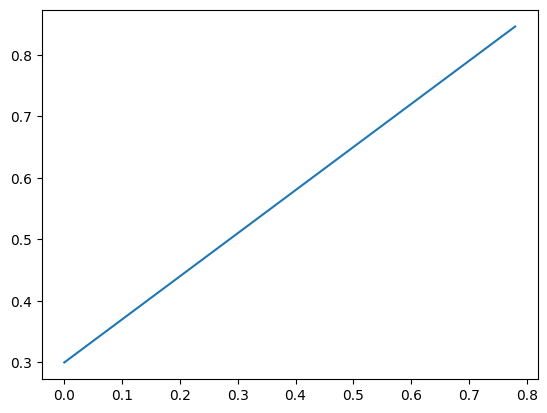

In [10]:
plt.plot(X_train, y_train)

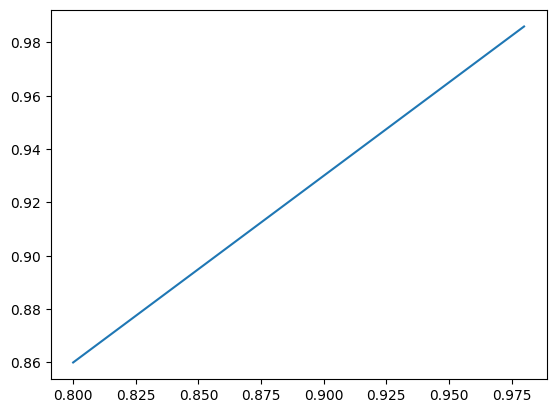

In [21]:
plt.plot(X_test, y_test)

In [23]:
class LinearRegressionModel(nn.Module): # parent class is nn.Module
  def __init__(self):
    super().__init__() # Inheriting qualities of parent class (nn.Module)
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True)
  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [24]:
model = LinearRegressionModel()

list(model.parameters())

[Parameter containing:
 tensor([-0.3648], requires_grad=True),
 Parameter containing:
 tensor([-0.0954], requires_grad=True)]

In [26]:
with torch.inference_mode():
    y_preds = model(X_test)

In [27]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[-0.3872],
        [-0.3945],
        [-0.4018],
        [-0.4091],
        [-0.4164],
        [-0.4237],
        [-0.4310],
        [-0.4383],
        [-0.4456],
        [-0.4529]])


In [28]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

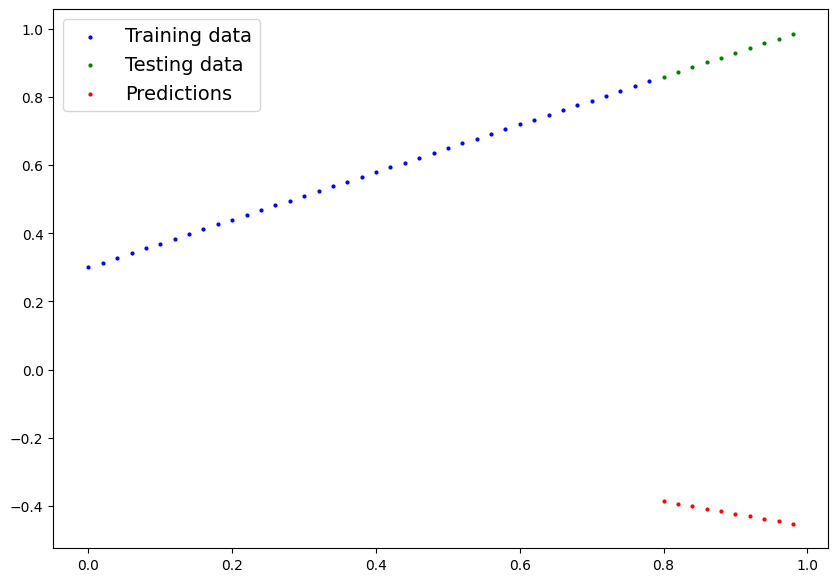

In [29]:
plot_predictions(predictions=y_preds)


In [30]:
y_test - y_preds

tensor([[1.2472],
        [1.2685],
        [1.2898],
        [1.3111],
        [1.3324],
        [1.3537],
        [1.3750],
        [1.3963],
        [1.4176],
        [1.4389]])

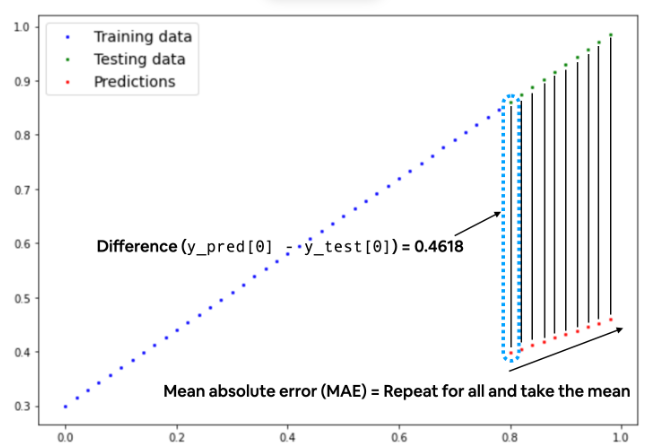

In [31]:
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

In [33]:
optimizer = torch.optim.SGD(params=model.parameters(), # parameters of target model to optimize
                            lr=0.01)